In [1]:
import os
import pandas as pd
from SpatialSpots import calculate_kde

In [2]:
from SpatialSpots import calculate_morans_i

In [3]:
csv_dir = './DOG-I-63X'
gene = ['M']
results = []

for sample in os.listdir(csv_dir):
    sample_path = os.path.join(csv_dir, sample)
    df = pd.read_csv(sample_path)
    print(df)
    if not df.empty:
        xy, density = calculate_kde(df, genes=gene, bandwidth=2, grid_size=10)
        morans_i = calculate_morans_i(xy, density[0], threshold_distance=50)
        
        results.append({
            'sample': sample,
            'morans_i': morans_i
        })

results_df = pd.DataFrame(results)
output_path = './test_combined_morans_i_results.csv'
results_df.to_csv(output_path, index=False)

print(f"Results saved to {output_path}")

            dim_1      dim_2       gene
0          0.0000    45.0000   PB1_701P
1          0.0000    90.0000   PB1_701P
2          0.0000   104.0000     Col4a1
3          0.0000   153.0000  PB1-P701H
4          0.0000   174.0000  PB1-P701H
...           ...        ...        ...
205906  2168.5000  2730.0000        PB2
205907  2254.5000  2610.0000        PB2
205908  2331.0217  2543.3696        PB2
205909  2301.5000  2649.0000        PB2
205910  2722.5000  2674.0000        PB2

[205911 rows x 3 columns]


100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


Results saved to ./test_combined_morans_i_results.csv


In [4]:
from SpatialSpots import calculate_wasserstein_distance

In [5]:
csv_dir = './DOG-I-63X'
genes = ['PB2', 'Col4a1','M']

for sample in os.listdir(csv_dir):
    sample_path = os.path.join(csv_dir, sample)
    df = pd.read_csv(sample_path)
    print(df)
    xy, densities = calculate_kde(df, genes, bandwidth=2, grid_size=10)
    w_dis = calculate_wasserstein_distance(densities, xy, genes=genes)
    print(w_dis)

            dim_1      dim_2       gene
0          0.0000    45.0000   PB1_701P
1          0.0000    90.0000   PB1_701P
2          0.0000   104.0000     Col4a1
3          0.0000   153.0000  PB1-P701H
4          0.0000   174.0000  PB1-P701H
...           ...        ...        ...
205906  2168.5000  2730.0000        PB2
205907  2254.5000  2610.0000        PB2
205908  2331.0217  2543.3696        PB2
205909  2301.5000  2649.0000        PB2
205910  2722.5000  2674.0000        PB2

[205911 rows x 3 columns]


100%|██████████| 3/3 [00:02<00:00,  1.04it/s]


go


100%|██████████| 3/3 [00:00<00:00, 11.57it/s]

[[   0.         3706.60091831 3957.28724443]
 [3706.60091831    0.         3763.06145831]
 [3957.28724443 3763.06145831    0.        ]]


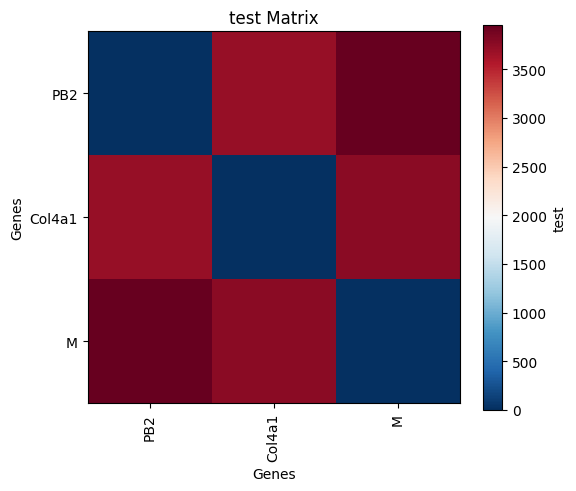

In [11]:
import matplotlib.pyplot as plt
import numpy as np 

plt.figure(figsize=(6, 5))
plt.imshow(w_dis, cmap='RdBu_r', interpolation='nearest')
plt.colorbar(label='test')
plt.xticks(np.arange(len(genes)), genes, rotation=90)
plt.yticks(np.arange(len(genes)), genes)
plt.title('test Matrix')
plt.xlabel('Genes')
plt.ylabel('Genes')
plt.show()